In [145]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

plt.rcParams["figure.dpi"] = 300

(array([2016.,    0., 1918.,    0.,    0., 2057.,    0., 1998.,    0.,
        2011.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

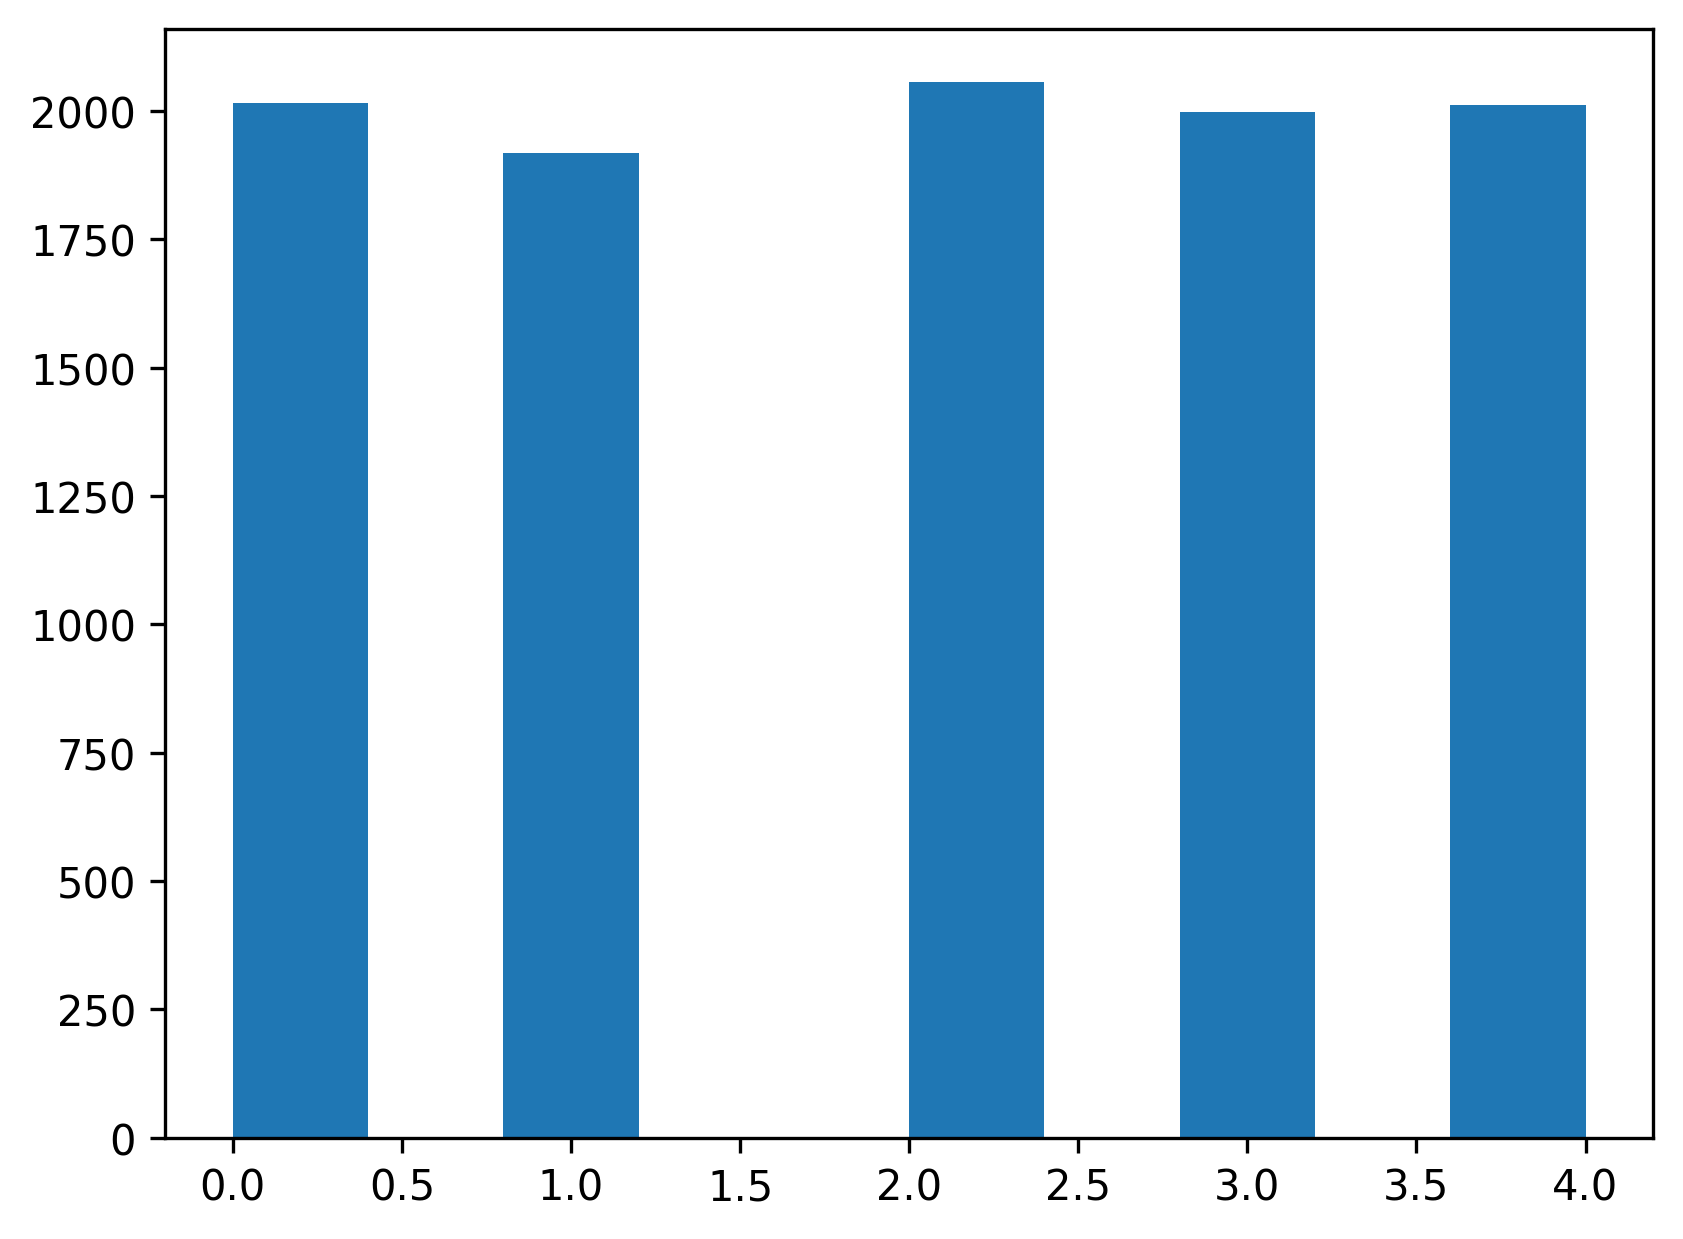

In [146]:
def uniform():
    rnd = np.random.uniform(0, 1)

    while rnd == 0.0:
        rnd = np.random.uniform(0, 1)
    return rnd

def choice(p):
    i = 0
    rnd = uniform() - p[0]

    while rnd >= 0:
        i += 1
        rnd = rnd - p[i]
    return i

plt.hist([choice(np.ones(5) / 5) for _ in range(10000)])

In [147]:
def gamble(n, p1=[1 / 3, 1 / 3, 1 / 3], p2=[1 / 3, 1 / 3, 1 / 3]):
    score = 0

    for _ in range(n):
        choice_p1 = choice(p1)
        choice_p2 = choice(p2)

        score += 1 if ((choice_p1 + choice_p2) % 2 == 0) else -1
    return score / n

def gamble_v2(n, p1=[1 / 3, 1 / 3, 1 / 3], p2=[1 / 3, 1 / 3, 1 / 3]):
    score = 0
    even = p1[0] * p2[0] + p1[0] * p2[2] + p1[1] * p2[1] + p1[2] * p2[0] + p1[2] * p2[2]

    for _ in range(n):
        rnd = uniform()
        score += (1 if rnd < even else -1)
    return score / n

gamble = np.vectorize(gamble, excluded=[1, 2])
gamble_v2 = np.vectorize(gamble_v2, excluded=[1, 2])


def E_player_1(p1=[1 / 3, 1 / 3, 1 / 3], p2=[1 / 3, 1 / 3, 1 / 3]):
    p_even = (
        p1[0] * p2[0] + p1[0] * p2[2] + p1[1] * p2[1] + p1[2] * p2[0] + p1[2] * p2[2]
    )
    return 2 * p_even - 1

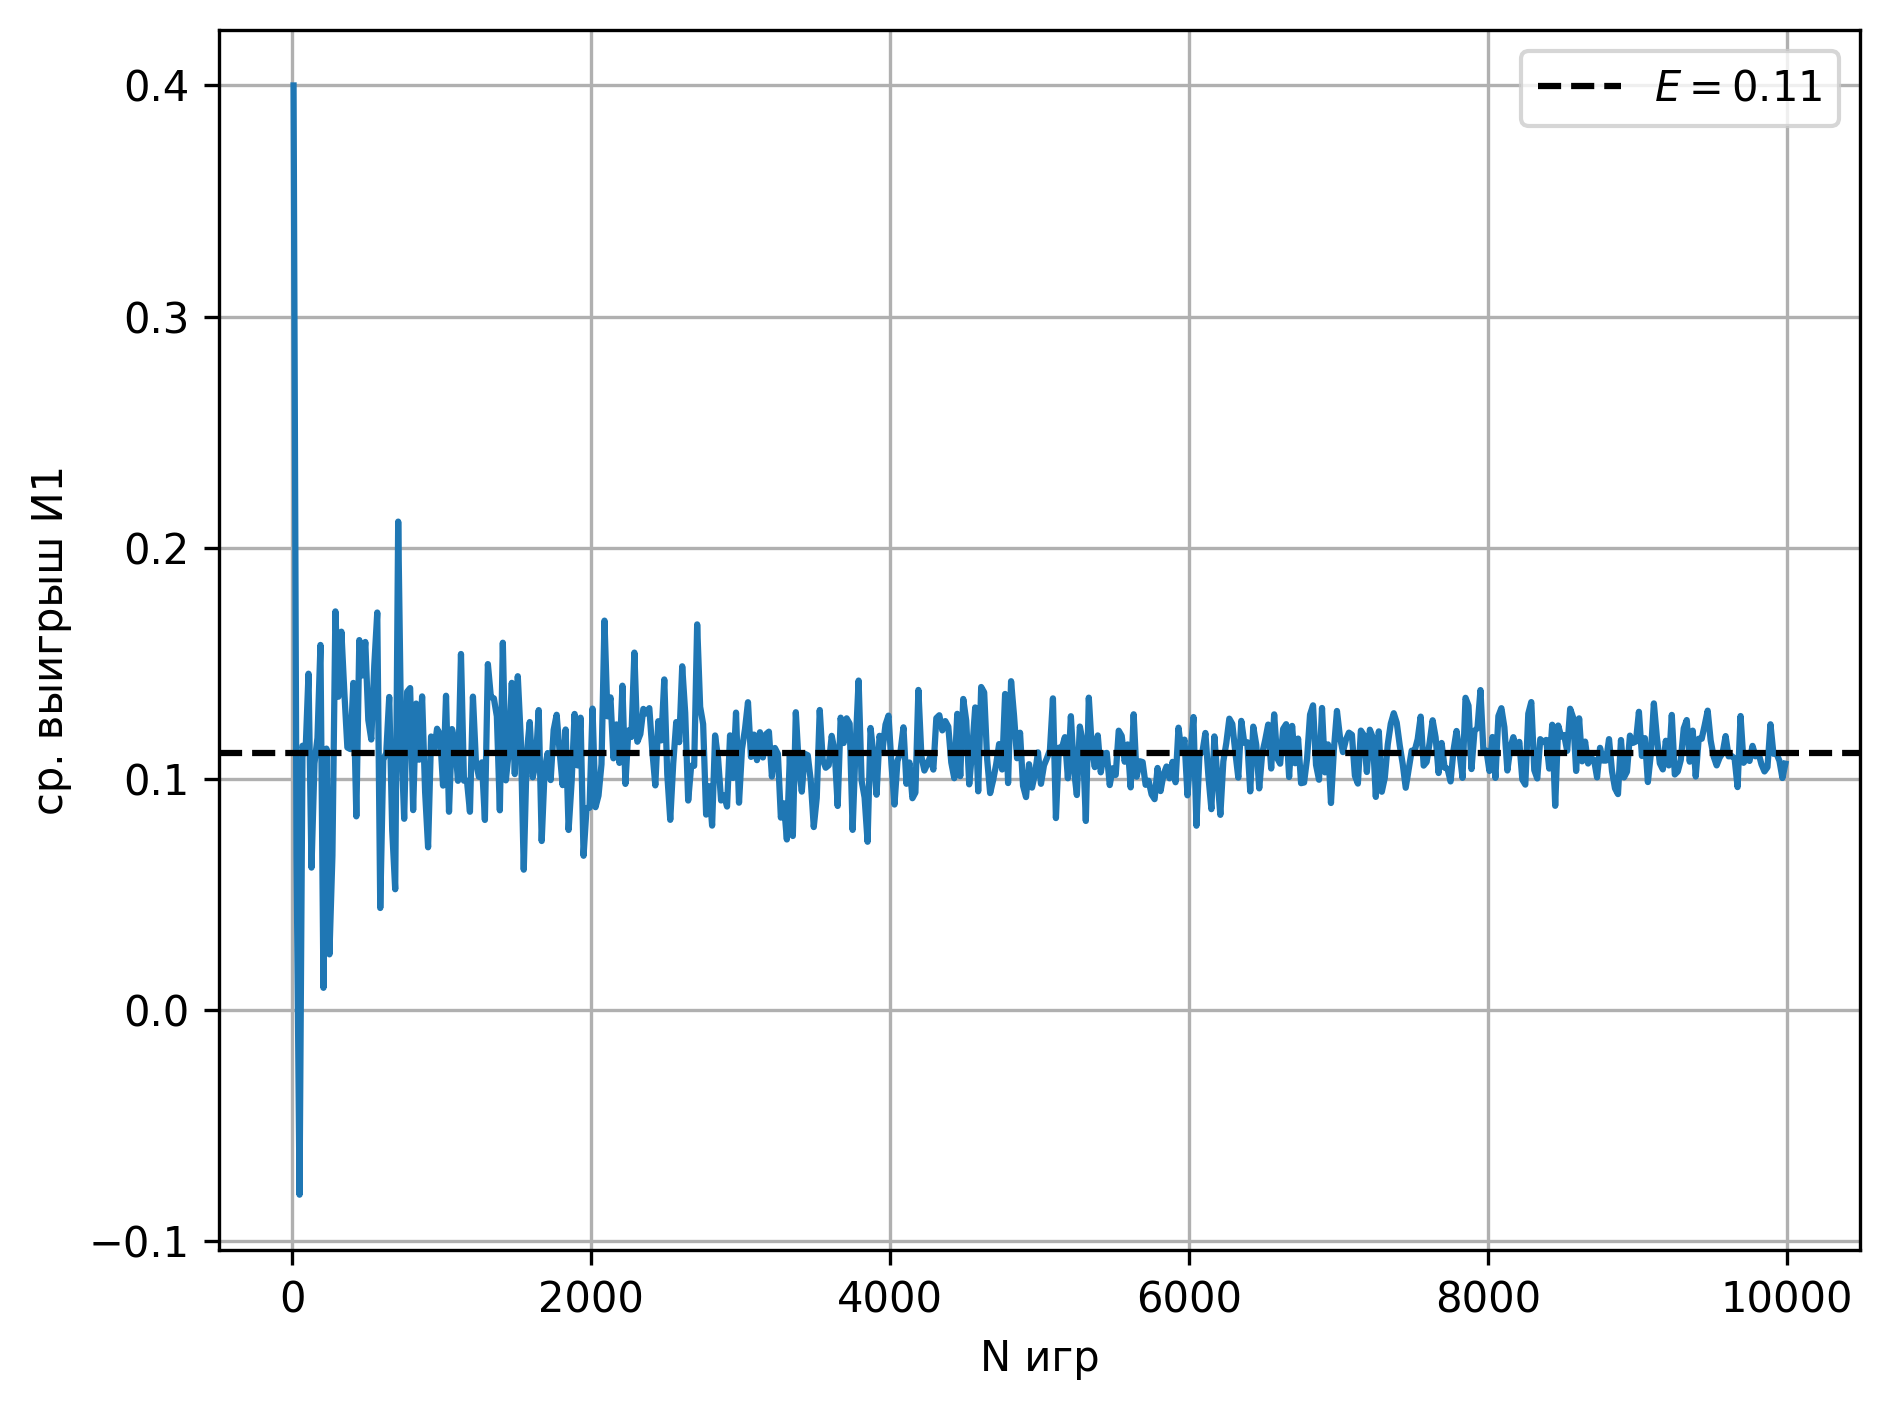

In [148]:

rounds = np.arange(10, 10_000, 20)
mean_scores = gamble(rounds)
real_mean = E_player_1()
plt.plot(rounds, mean_scores)
plt.axhline(real_mean, linestyle='--', color='black', label=rf'$E={real_mean:.2f}$')
plt.xlabel('N игр')
plt.ylabel('ср. выигрыш И1')
plt.grid(True)
plt.tight_layout()
plt.legend()

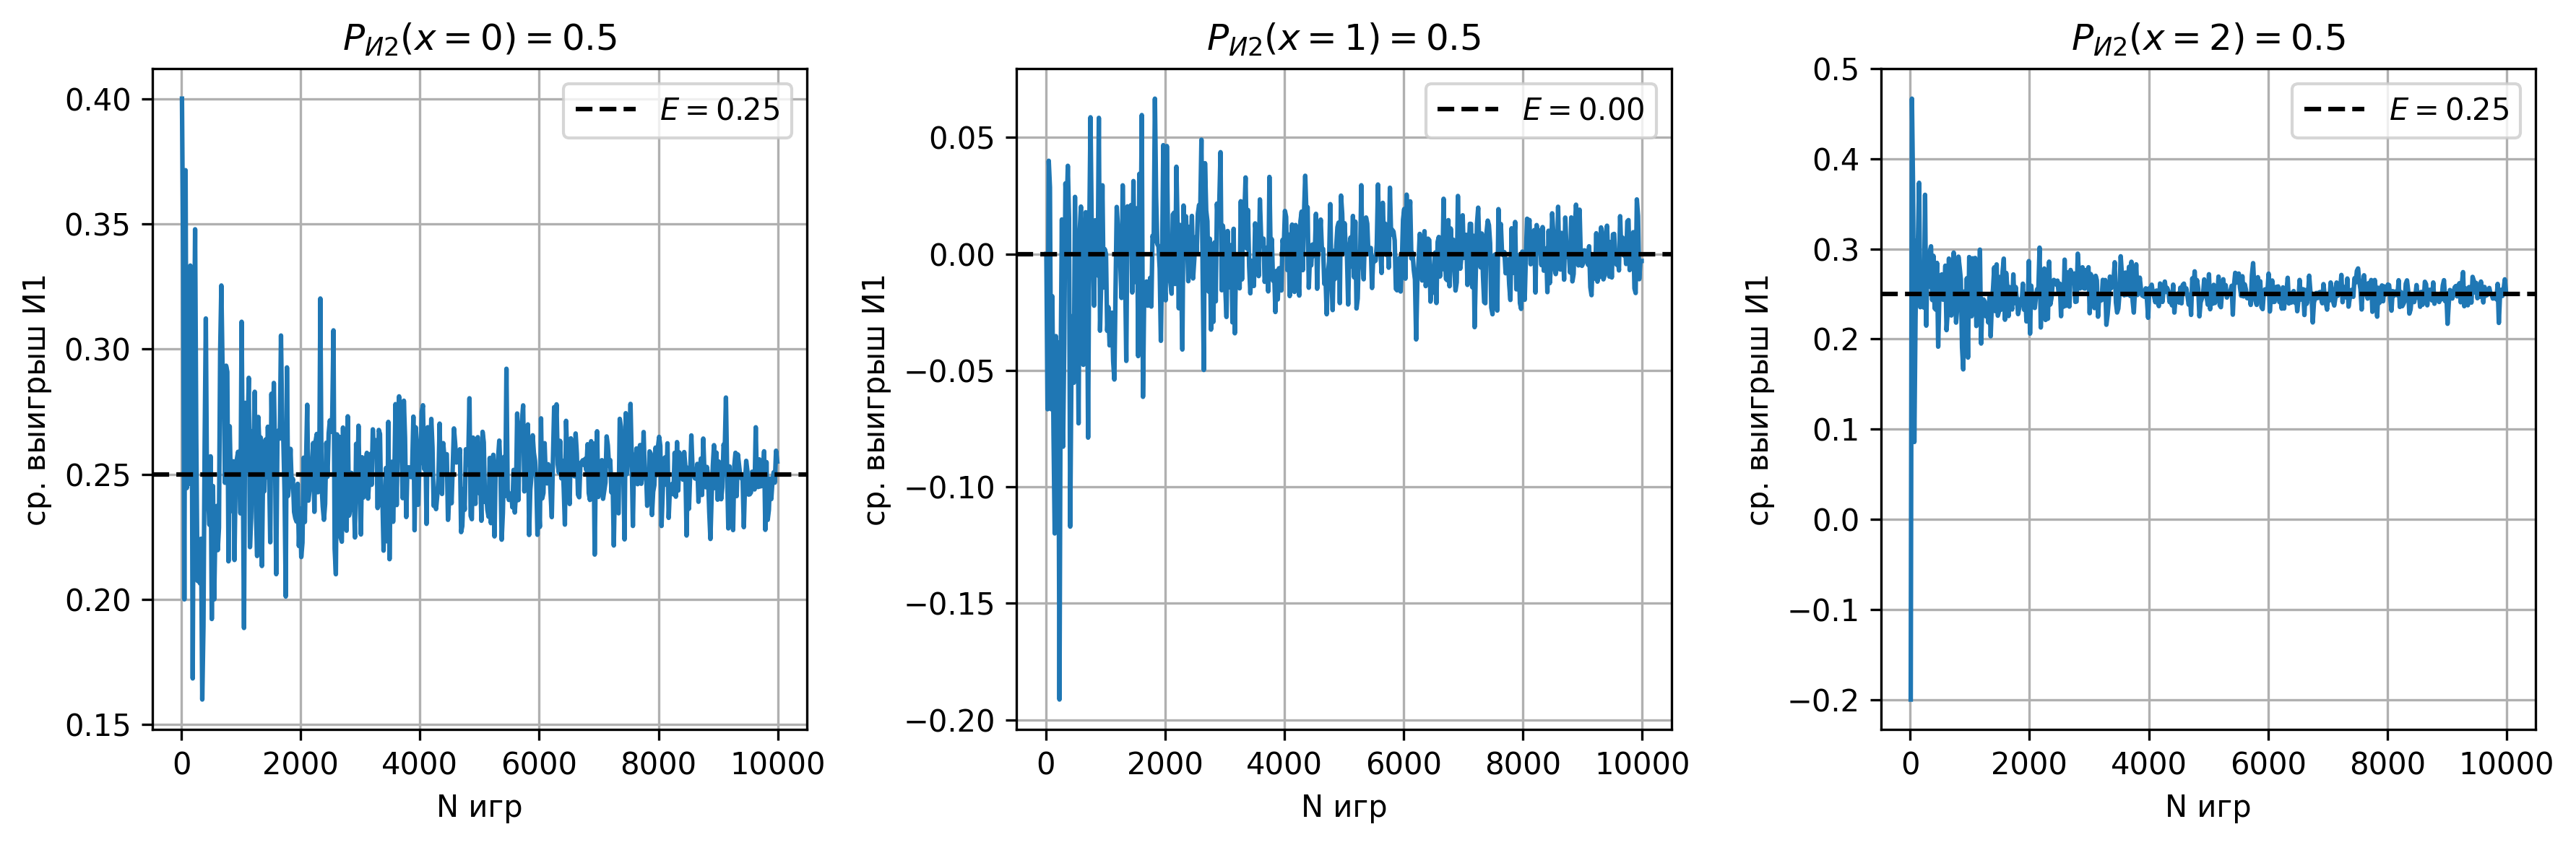

In [149]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

p1 = [0.25, 0.25, 0.5]
for i in range(3):
    p2 = [0.25, 0.25, 0.25]
    p2[i] = 0.5

    rounds = np.arange(10, 10_000, 20)
    mean_scores = gamble_v2(rounds, p1, p2)
    real_mean = E_player_1(p1, p2)

    ax[i].plot(rounds, mean_scores)
    ax[i].axhline(real_mean, linestyle="--", color="black", label=rf"$E={real_mean:.2f}$")
    ax[i].set_xlabel("N игр")
    ax[i].set_ylabel("ср. выигрыш И1")
    ax[i].set_title(rf'$P_{{И2}}(x={i})=0.5$')
    ax[i].grid(True)
    ax[i].legend()
plt.tight_layout()

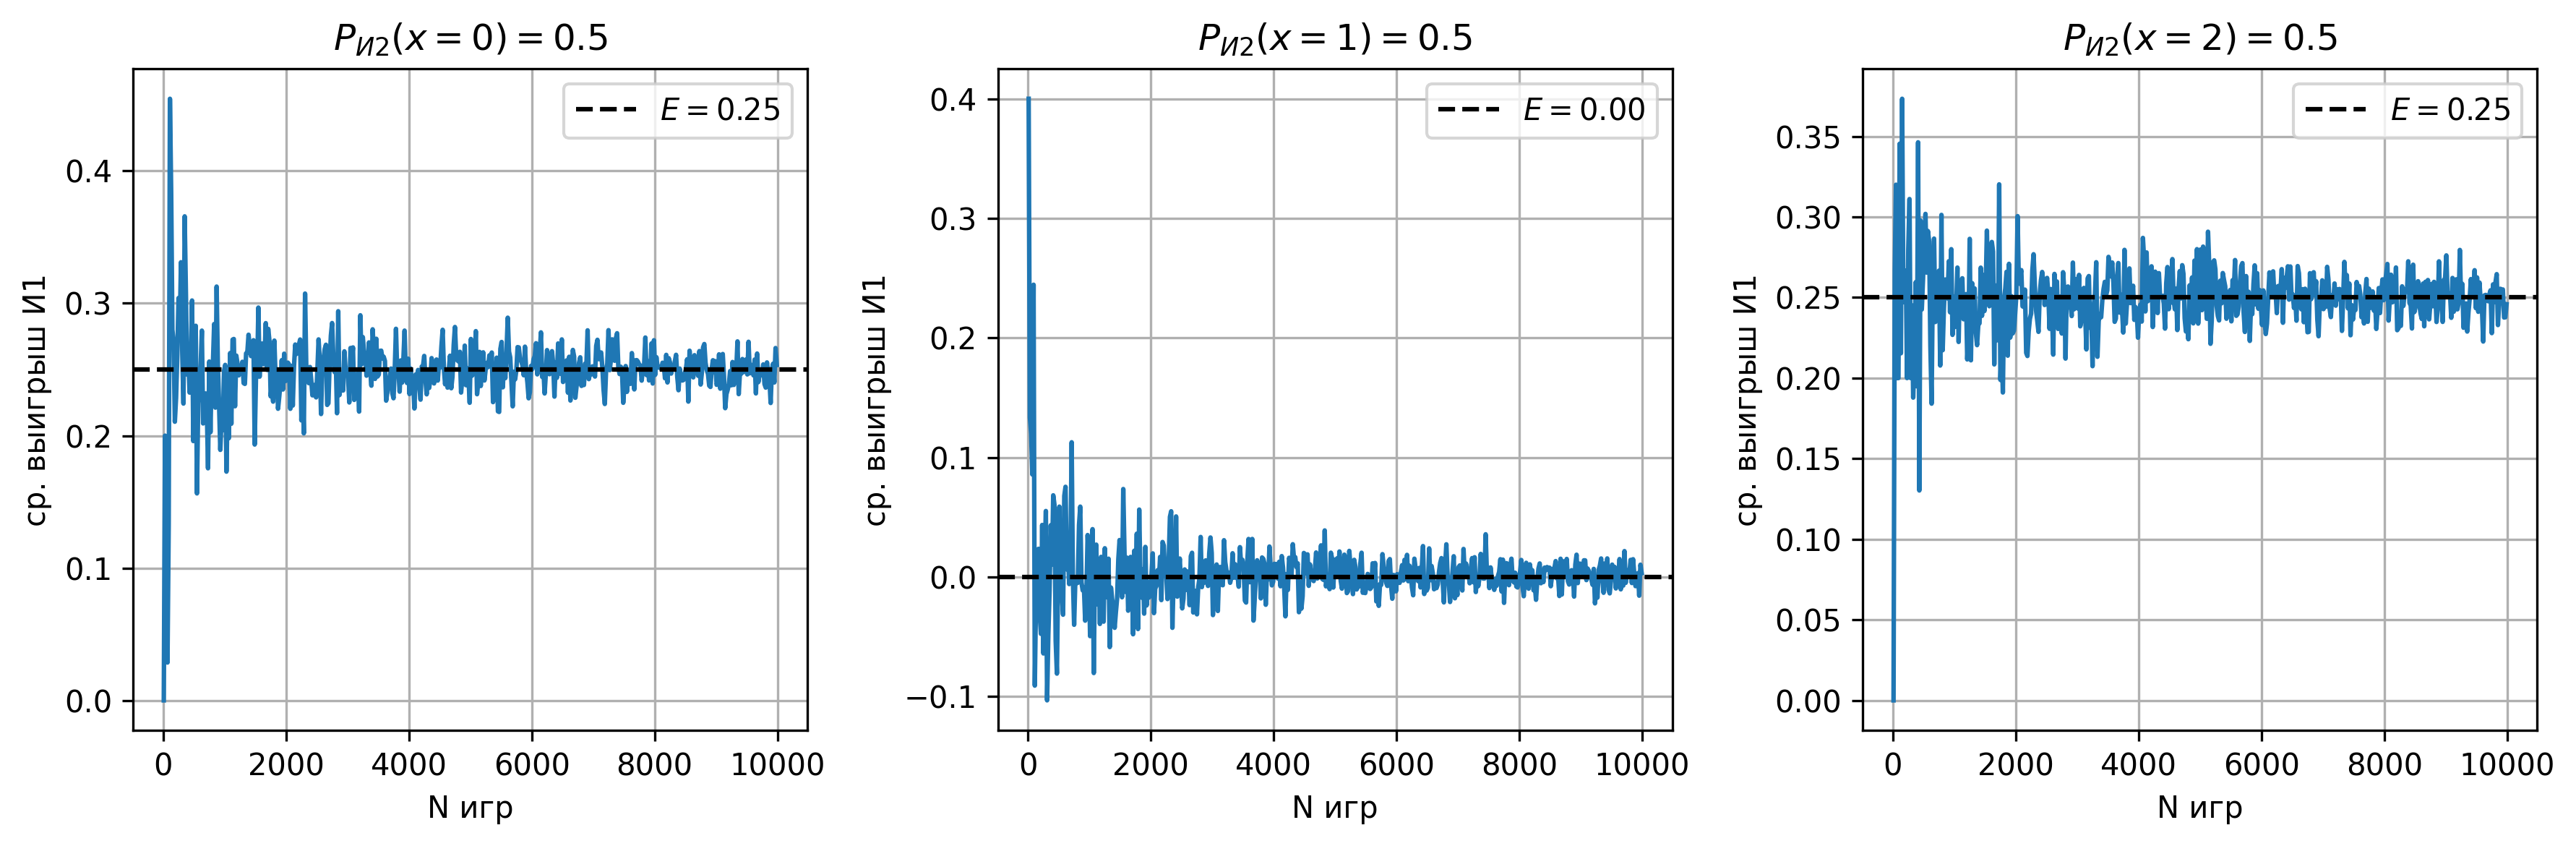

In [150]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

p1 = [0.25, 0.25, 0.5]
for i in range(3):
    p2 = [0.25, 0.25, 0.25]
    p2[i] = 0.5

    rounds = np.arange(10, 10_000, 20)
    mean_scores = gamble(rounds, p1, p2)
    real_mean = E_player_1(p1, p2)

    ax[i].plot(rounds, mean_scores)
    ax[i].axhline(
        real_mean, linestyle="--", color="black", label=rf"$E={real_mean:.2f}$"
    )
    ax[i].set_xlabel("N игр")
    ax[i].set_ylabel("ср. выигрыш И1")
    ax[i].set_title(rf"$P_{{И2}}(x={i})=0.5$")
    ax[i].grid(True)
    ax[i].legend()
plt.tight_layout()